In [1]:
import tensorflow as tf
from tensorflow import keras 

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 

import sklearn

import os

In [2]:
train_dir = '/Users/asmaamohamed/Desktop/Teeth_Dataset/Training'
test_dir  = '/Users/asmaamohamed/Desktop/Teeth_Dataset/Testing'
val_dir   = '/Users/asmaamohamed/Desktop/Teeth_Dataset/Validation'

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int',
    shuffle    =  True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

class_names = train_ds.class_names
print(class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


2025-07-03 19:35:27.007709: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


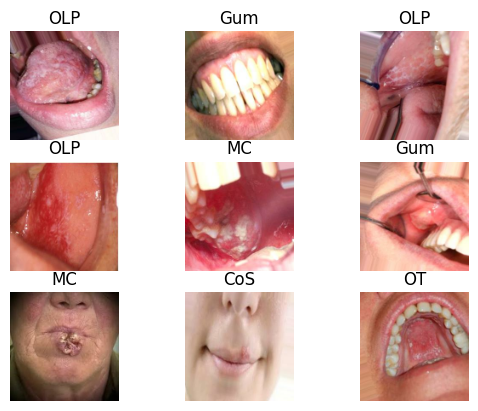

In [4]:
plt.Figure(figsize= (8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')


In [11]:
from tensorflow.keras import layers, models


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size= AUTOTUNE)

2025-07-03 19:43:53.024123: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-07-03 19:43:53.202571: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


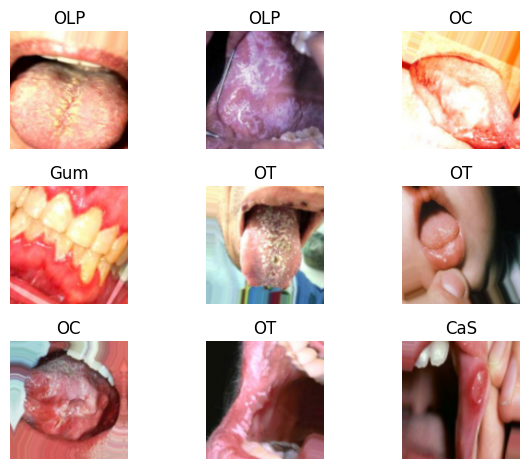

In [13]:
plt.Figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    augmented_img = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(augmented_img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
from tensorflow.keras import layers, models


num_classes = 7

model = keras.Sequential([
    
    data_augmentation,

    #normalization
    layers.Rescaling(1./255, input_shape = (128, 128, 3)),

    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256,(3,3), activation= 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),
    
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation = 'softmax')
])

/Users/asmaamohamed/Dropbox/Development/Computer vision intern/teeth_classification_project/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

In [19]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20,
    callbacks = [early_stop]
)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.1537 - loss: 1.9438 - val_accuracy: 0.2471 - val_loss: 1.8682
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.2579 - loss: 1.8575 - val_accuracy: 0.2315 - val_loss: 1.8230
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.3096 - loss: 1.7532 - val_accuracy: 0.3696 - val_loss: 1.6916
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.3510 - loss: 1.6635 - val_accuracy: 0.4037 - val_loss: 1.5771
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.3971 - loss: 1.5568 - val_accuracy: 0.4582 - val_loss: 1.4648
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.4288 - loss: 1.4886 - val_accuracy: 0.4416 - val_loss: 1.4759
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.4493 - loss: 1.4273 - val_accuracy: 0.4971 - val_loss: 1.3538
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.4725 - loss: 1.3561 - val_accu

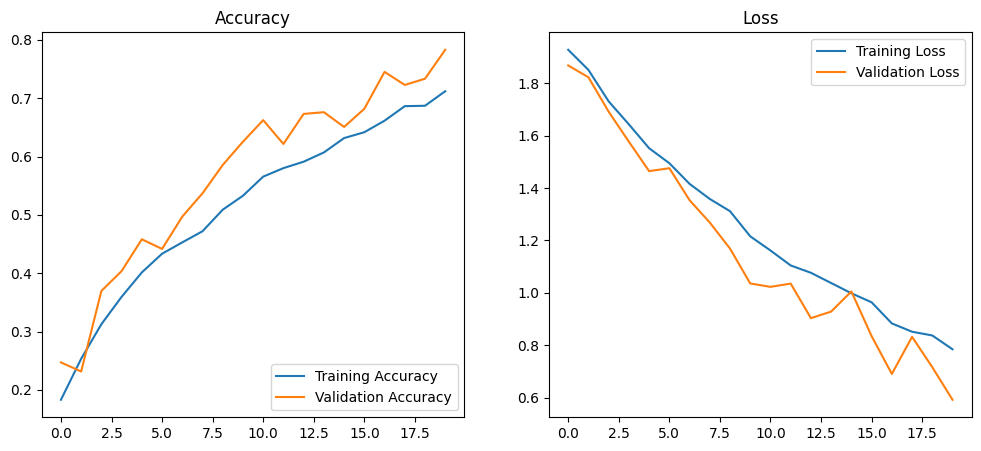

In [20]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8269 - loss: 0.5637
Test Accuracy: 0.8171
Test Loss: 0.5803
